In [1]:
import nglview as ng
import mdtraj as md
import pandas as pd

In [3]:
!gmx_mpi grompp -f nvt-charmm.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

                      :-) GROMACS - gmx grompp, 2025.0 (-:

Executable:   /usr/local/gromacs/bin/gmx_mpi
Data prefix:  /usr/local/gromacs
Working dir:  /mnt/efs/src/gromacs
Command line:
  gmx_mpi grompp -f nvt-charmm.mdp -c em.gro -r em.gro -p topol.top -o nvt.tpr

Ignoring obsolete mdp entry 'title'
Setting the LD random seed to -9568313

Generated 20503 of the 20503 non-bonded parameter combinations
Generating 1-4 interactions: fudge = 1

Generated 17396 of the 20503 1-4 parameter combinations

Excluding 3 bonded neighbours molecule type 'Protein_chain_A'

turning H bonds into constraints...

Excluding 3 bonded neighbours molecule type 'Protein_chain_L'

turning H bonds into constraints...

Excluding 2 bonded neighbours molecule type 'SOL'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'NA'

turning H bonds into constraints...

Excluding 1 bonded neighbours molecule type 'CL'

turning H bonds into constraints...

Setting gen_seed to -1100513345

Ve

In [7]:
!mpirun -np 3 gmx_mpi mdrun -deffnm nvt

                      :-) GROMACS - gmx mdrun, 2025.0 (-:

Executable:   /usr/local/gromacs/bin/gmx_mpi
Data prefix:  /usr/local/gromacs
Working dir:  /home/ubuntu/src/gromacs
Command line:
  gmx_mpi mdrun -deffnm nvt


Back Off! I just backed up nvt.log to ./#nvt.log.2#
Reading file nvt.tpr, VERSION 2025.0 (single precision)
Changing nstlist from 10 to 80, rlist from 1.2 to 1.316

Using 3 MPI processes
Using 1 OpenMP thread per MPI process


Back Off! I just backed up nvt.trr to ./#nvt.trr.2#

Back Off! I just backed up nvt.edr to ./#nvt.edr.2#
starting mdrun 'COAGULATION FACTOR XA'
50000 steps,    100.0 ps.

Writing final coordinates.


Dynamic load balancing report:
 DLB was turned on during the run due to measured imbalance.
 Average load imbalance: 0.8%.
 The balanceable part of the MD step is 87%, load imbalance is computed from this.
 Part of the total run time spent waiting due to load imbalance: 0.7%.
 Steps where the load balancing was limited by -rdd, -rcon and/or -dds: X 0 

In [8]:
# Write the whole system including water by specifying "System" explicitly
!printf "Protein\nSystem\n" | gmx_mpi trjconv -s nvt.tpr -f nvt.trr -o nvt_center_explicit.xtc -center -pbc mol

                     :-) GROMACS - gmx trjconv, 2025.0 (-:

Executable:   /usr/local/gromacs/bin/gmx_mpi
Data prefix:  /usr/local/gromacs
Working dir:  /home/ubuntu/src/gromacs
Command line:
  gmx_mpi trjconv -s nvt.tpr -f nvt.trr -o nvt_center_explicit.xtc -center -pbc mol

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write xtc: Compressed trajectory (portable xdr format): xtc
Reading file nvt.tpr, VERSION 2025.0 (single precision)
Reading file nvt.tpr, VERSION 2025.0 (single precision)
Select group for centering
Group     0 (         System) has 39600 elements
Group     1 (        Protein) has  4417 elements
Group     2 (      Protein-H) has  2238 elements
Group     3 (        C-alpha) has   286 elements
Group     4 (       Backbone) has   858 elements
Group     5 (      MainChain) has  1142 elements
Group     6 (   MainChain+Cb) has  1401 elements
Group     7 (    MainChain+H) has  1423 elements
Group     8 (      SideChain) has  

In [9]:
# First, create an explicit index file that clearly names the groups
!echo -e "keep 0\nname 0 FullSystem\nq\n" | gmx_mpi make_ndx -f nvt.tpr -o nvt_full_index.ndx

# Then run the conversion with explicit reference to these groups
!echo -e "Protein\nFullSystem\n" | gmx_mpi trjconv -s nvt.tpr -f nvt.trr -o nvt_all.xtc -center -pbc mol -n nvt_full_index.ndx

                     :-) GROMACS - gmx make_ndx, 2025.0 (-:

Executable:   /usr/local/gromacs/bin/gmx_mpi
Data prefix:  /usr/local/gromacs
Working dir:  /home/ubuntu/src/gromacs
Command line:
  gmx_mpi make_ndx -f nvt.tpr -o nvt_full_index.ndx


Reading structure file
Reading file nvt.tpr, VERSION 2025.0 (single precision)
Reading file nvt.tpr, VERSION 2025.0 (single precision)
Going to read 0 old index file(s)
Analysing residue names:
There are:   286    Protein residues
There are: 11703      Water residues
There are:    74        Ion residues
Analysing Protein...

  0 System              : 39600 atoms
  1 Protein             :  4417 atoms
  2 Protein-H           :  2238 atoms
  3 C-alpha             :   286 atoms
  4 Backbone            :   858 atoms
  5 MainChain           :  1142 atoms
  6 MainChain+Cb        :  1401 atoms
  7 MainChain+H         :  1423 atoms
  8 SideChain           :  2994 atoms
  9 SideChain-H         :  1096 atoms
 10 Prot-Masses         :  4417 atoms
 11 non-P

In [10]:
new_traj = md.load("nvt_all.xtc", top="1fjs_solv_ions.gro")
water_in_new = [res.name for res in new_traj.topology.residues if res.name in ['SOL', 'WAT', 'HOH', 'TIP3']]
print(f"Number of water residues in new trajectory: {len(water_in_new)}")

/home/ubuntu/src/gromacs/.venv/lib/python3.13/site-packages/mdtraj/formats/gro.py:364: UserWarning: WARNING: two consecutive residues with same number (ALA, GLN)
  warnings.warn(
/home/ubuntu/src/gromacs/.venv/lib/python3.13/site-packages/mdtraj/formats/gro.py:364: UserWarning: WARNING: two consecutive residues with same number (GLU, PRO)
  warnings.warn(
/home/ubuntu/src/gromacs/.venv/lib/python3.13/site-packages/mdtraj/formats/gro.py:364: UserWarning: WARNING: two consecutive residues with same number (LEU, THR)
  warnings.warn(
/home/ubuntu/src/gromacs/.venv/lib/python3.13/site-packages/mdtraj/formats/gro.py:364: UserWarning: WARNING: two consecutive residues with same number (MET, LEU)
  warnings.warn(
/home/ubuntu/src/gromacs/.venv/lib/python3.13/site-packages/mdtraj/formats/gro.py:364: UserWarning: WARNING: two consecutive residues with same number (ASP, TYR)
  warnings.warn(
/home/ubuntu/src/gromacs/.venv/lib/python3.13/site-packages/mdtraj/formats/gro.py:364: UserWarning: WARNI

Number of water residues in new trajectory: 11703


In [13]:
view = ng.show_mdtraj(new_traj)
#view.add_surface(selection="protein", opacity=0.2)

view.add_representation(repr_type='spacefill', selection='NA')
view.add_representation(repr_type='spacefill', selection='CL')
#view.add_representation(repr_type='ball+stick', selection='SOL')
# Show only water within 5 Angstroms of the protein
view.add_representation(repr_type='line', selection='resname SOL and within 2 of protein')
view.camera='orthographic'
view.center(selection="protein")
view

NGLWidget(max_frame=250)

In [14]:
!echo "Temperature" | gmx_mpi energy -f nvt.edr -o temperature.xvg -xvg none -b 20

                      :-) GROMACS - gmx energy, 2025.0 (-:

Executable:   /usr/local/gromacs/bin/gmx_mpi
Data prefix:  /usr/local/gromacs
Working dir:  /home/ubuntu/src/gromacs
Command line:
  gmx_mpi energy -f nvt.edr -o temperature.xvg -xvg none -b 20

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  U-B              3  Proper-Dih.      4  Improper-Dih. 
  5  CMAP-Dih.        6  LJ-14            7  Coulomb-14       8  LJ-(SR)       
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pressure        18  Constr.-rmsd    19  Vir-XX          20  Vir-XY        
 21  Vir-XZ          22  Vir-YX          23  Vir-YY        

<Axes: xlabel='time'>

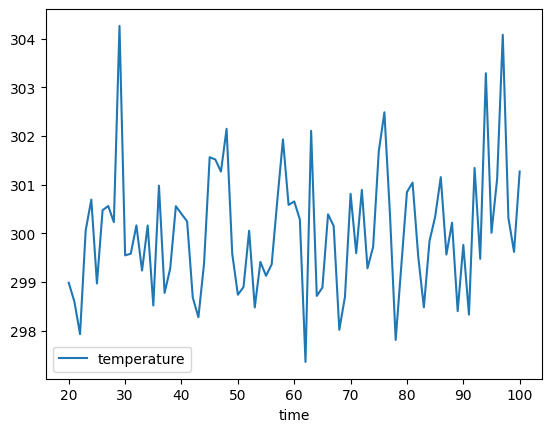

In [15]:
df = pd.read_csv('temperature.xvg', sep='\\s+', header=None, names=['time','temperature'])
df.plot('time')

In [18]:
!printf "Potential\n0\n" | gmx_mpi energy -f nvt.edr -o nvt_potential.xvg -xvg none

                      :-) GROMACS - gmx energy, 2025.0 (-:

Executable:   /usr/local/gromacs/bin/gmx_mpi
Data prefix:  /usr/local/gromacs
Working dir:  /home/ubuntu/src/gromacs
Command line:
  gmx_mpi energy -f nvt.edr -o nvt_potential.xvg -xvg none

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  U-B              3  Proper-Dih.      4  Improper-Dih. 
  5  CMAP-Dih.        6  LJ-14            7  Coulomb-14       8  LJ-(SR)       
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pressure        18  Constr.-rmsd    19  Vir-XX          20  Vir-XY        
 21  Vir-XZ          22  Vir-YX          23  Vir-YY          24

<Axes: xlabel='step'>

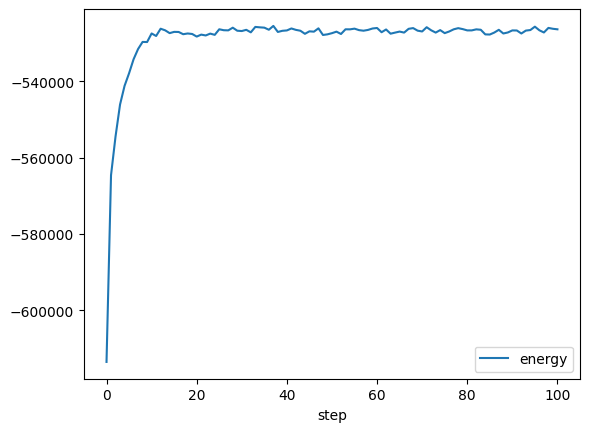

In [19]:
df = pd.read_csv('nvt_potential.xvg', sep='\\s+', header=None, names=['step','energy'])
df.plot('step')

In [20]:
!printf "Pressure\n0\n" | gmx_mpi energy -f nvt.edr -o nvt_pressure.xvg -xvg none

                      :-) GROMACS - gmx energy, 2025.0 (-:

Executable:   /usr/local/gromacs/bin/gmx_mpi
Data prefix:  /usr/local/gromacs
Working dir:  /home/ubuntu/src/gromacs
Command line:
  gmx_mpi energy -f nvt.edr -o nvt_pressure.xvg -xvg none

Opened nvt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  U-B              3  Proper-Dih.      4  Improper-Dih. 
  5  CMAP-Dih.        6  LJ-14            7  Coulomb-14       8  LJ-(SR)       
  9  Coulomb-(SR)    10  Coul.-recip.    11  Position-Rest.  12  Potential     
 13  Kinetic-En.     14  Total-Energy    15  Conserved-En.   16  Temperature   
 17  Pressure        18  Constr.-rmsd    19  Vir-XX          20  Vir-XY        
 21  Vir-XZ          22  Vir-YX          23  Vir-YY          24 

<Axes: xlabel='time'>

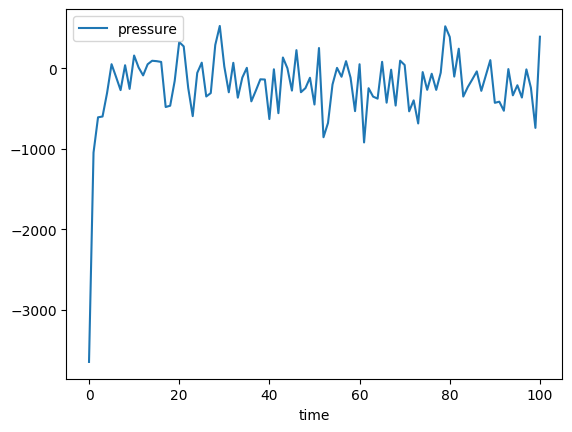

In [23]:
df = pd.read_csv('nvt_pressure.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')